In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('Multi_40.txt', skiprows = 29,sep='\t')
 
data.columns = ['Timestamp', 'Channel A', 'Channel B', 'Unnamed']
data_1 = data.drop('Channel B', axis=1)
data_2 = data_1.drop('Unnamed', axis=1)
data_2['Channel A'] = pd.to_numeric(data_2["Channel A"], errors='coerce')
data_3 = data_2.dropna()
import sys
np.set_printoptions(threshold=sys.maxsize)
data_3.to_numpy()

#e1 = (data_3.to_numpy()[:, 0] > 30)
#e2 = (data_3.to_numpy()[:, 0] < 100)
arr = data_3.to_numpy()#[e1 & e2]
print(data_3.to_numpy())#[e1 & e2])
#print(data_3.to_numpy())
data_list = arr.tolist()
type(data_list)

[[8.00000e-03 1.73800e-01]
 [7.20000e-02 1.71700e-01]
 [1.36000e-01 1.73100e-01]
 [2.00000e-01 1.74500e-01]
 [2.64000e-01 1.74100e-01]
 [3.28000e-01 1.73200e-01]
 [3.92000e-01 1.73400e-01]
 [4.56000e-01 1.74200e-01]
 [5.20000e-01 1.74900e-01]
 [5.84000e-01 1.74800e-01]
 [6.48000e-01 1.73100e-01]
 [7.44000e-01 1.72300e-01]
 [8.08000e-01 1.74300e-01]
 [8.72000e-01 1.74700e-01]
 [9.35000e-01 1.73900e-01]
 [9.99000e-01 1.73500e-01]
 [1.06400e+00 1.74300e-01]
 [1.12800e+00 1.72800e-01]
 [1.19200e+00 1.71700e-01]
 [1.25600e+00 1.73000e-01]
 [1.32000e+00 1.73700e-01]
 [1.38400e+00 1.73600e-01]
 [1.44800e+00 1.73900e-01]
 [1.54400e+00 1.73700e-01]
 [1.60700e+00 1.72700e-01]
 [1.67200e+00 1.74300e-01]
 [1.73500e+00 1.73800e-01]
 [1.79900e+00 1.73400e-01]
 [1.86400e+00 1.73900e-01]
 [1.92800e+00 1.73900e-01]
 [1.99100e+00 1.68000e-01]
 [2.05500e+00 1.66000e-01]
 [2.11900e+00 1.63700e-01]
 [2.18300e+00 1.66600e-01]
 [2.24700e+00 1.71700e-01]
 [2.34300e+00 1.76200e-01]
 [2.40700e+00 1.79300e-01]
 

list

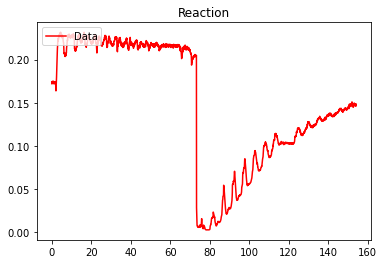

0.2317
The x-value with maximum y-value is : 8.188888888888888


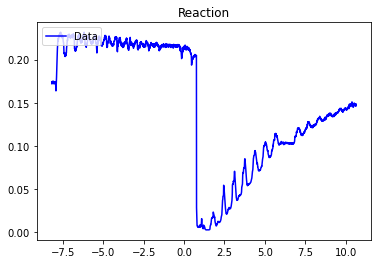

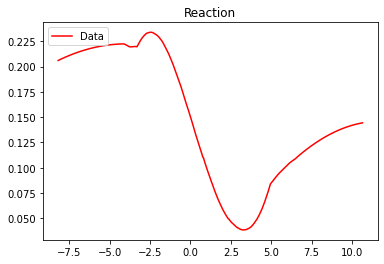

In [2]:
import matplotlib.pyplot as plt 
from scipy.signal import savgol_filter
xi = arr[:,0]
x = arr[:,0]
y = arr[:,1]
yfi = savgol_filter(y, 1001, 2) # window size 51, polynomial order 3

plt.plot(xi,y,'-r') 
plt.title('Reaction') 
plt.legend(['Data'], loc='upper left')
plt.show()

a = max(y)
print(a)
# Python3 code to demonstrate 
# to get tuple info. of maximum value tuple
# using max() + itemgetter()
from operator import itemgetter
# using max() + itemgetter()
# to get tuple info. of maximum value tuple
toc = 9/1.1
res = 67
# printing result
print ("The x-value with maximum y-value is : " + str(res/toc))

plt.plot((x-res)/toc,y,'-b') 
#toc - time for moving translation stage by 1cm. 
plt.title('Reaction') 
plt.legend(['Data'], loc='upper left')
plt.show()

plt.plot(((x-res)/toc),yfi,'-r') 
plt.title('Reaction') 
plt.legend(['Data'], loc='upper left')
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Define the function
def Closed(x,c,e,d):
    return c*(1  + (4*e*x/((x**2 + 9)+(x**2 + 1))) - (d/(1 + x**2)))
popt, pcov = curve_fit(Closed, (x-res)/toc, yfi)

In [4]:
from pylab import *
fit_c = popt[0]
fit_e = popt[1]
fit_d = popt[2]
err_c = sqrt(pcov[0][0])
err_e = sqrt(pcov[1][1])
err_d = sqrt(pcov[2][2])

print("The best fit for c is: " + str(fit_c))
print("The best fit for d is: " + str(fit_d))
print("The best fit for e is: " + str(fit_e))
print("The error for c is: " + str(err_c))
print("The error for d is: " + str(err_d))
print("The error for e is: " + str(err_e))

The best fit for c is: 0.15594859994124194
The best fit for d is: 0.09393366424479847
The best fit for e is: -1.2409449494117126
The error for c is: 0.00039167133305471007
The error for d is: 0.00856034902128142
The error for e is: 0.006993995549453852


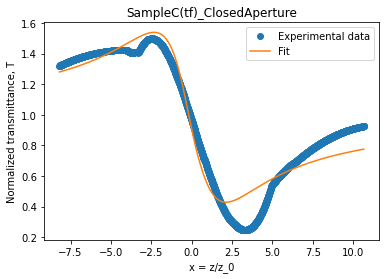

In [5]:
fit_y = Closed((x-res)/toc, fit_c, fit_e, fit_d)
plt.title('SampleC(tf)_ClosedAperture') 
plt.xlabel('x = z/z_0')
plt.ylabel('Normalized transmittance, T')
plt.plot((x-res)/toc, yfi/fit_c, 'o', label='Experimental data')
plt.plot((x-res)/toc, fit_y/fit_c, '-', label='Fit')
plt.legend()